### Keras 

https://keras.io/applications/#available-models




In [5]:
import numpy as np
import pickle, time
from copy import deepcopy
from shutil import copy
import import_ipynb
from tqdm import tqdm_notebook as tqdm
import RMT_Util

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import powerlaw

import tensorflow as tf
import keras
from keras.callbacks import TensorBoard, EarlyStopping
from keras.optimizers import SGD
from keras.initializers import Constant
import keras.backend as K

from keras.applications import vgg16, vgg19, inception_resnet_v2, mobilenet, nasnet 

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix


print(sys.version)
print("numpy version {}".format(np.__version__))
print("tensforflow version {}".format(tf.__version__))
print("keras version {}".format(keras.__version__))

3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.2
tensforflow version 1.5.0-dev20171116
keras version 2.1.5


### Fit Marchenko Pastur to ESD


In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())



(3, 3, 3, 64)
(27, 64)


Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


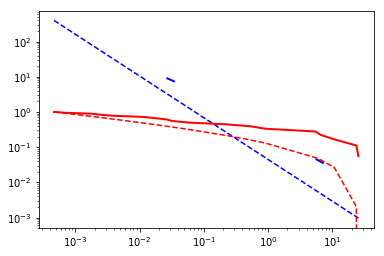

% spikes outside bulk 0.00
% sigma 3.0599


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Utilility Library"


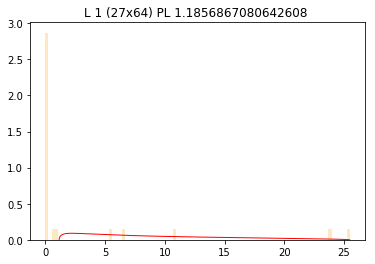

1.1856867080642608 0.2360074598332435 TPL


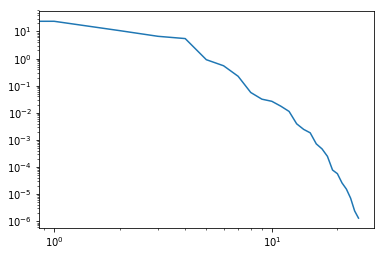

(3, 3, 64, 64)
(576, 64)


Calculating best minimal value for power law fit
Assuming nested distributions


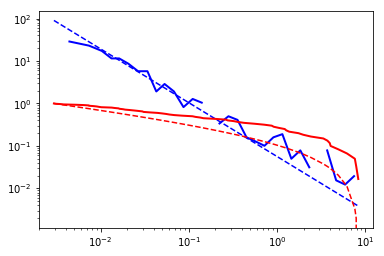

% spikes outside bulk 0.00
% sigma 2.1679


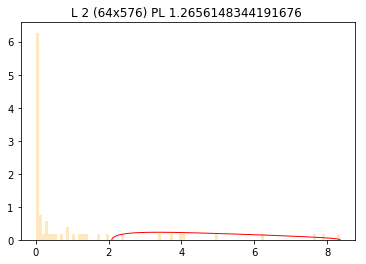

1.2656148344191676 0.2089896971220011 TPL


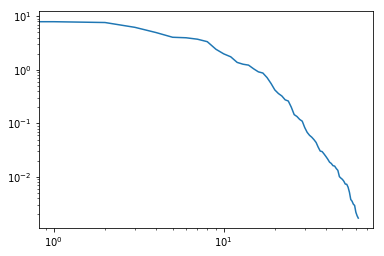

(3, 3, 64, 128)
(576, 128)


Calculating best minimal value for power law fit
Assuming nested distributions


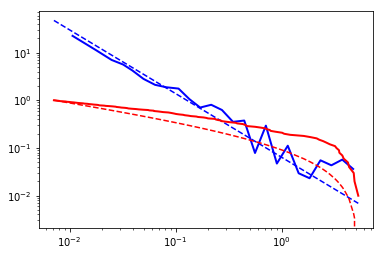

% spikes outside bulk 0.00
% sigma 1.5636


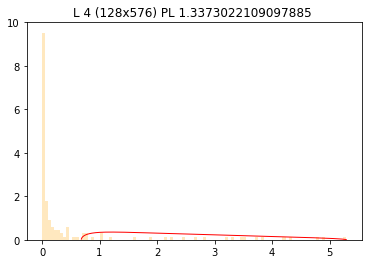

1.3373022109097885 0.19040517705572585 TPL


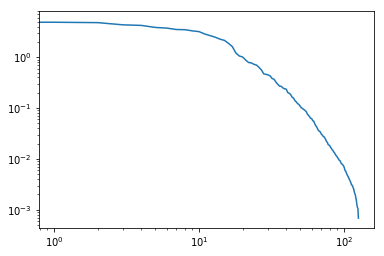

(3, 3, 128, 128)
(1152, 128)


Calculating best minimal value for power law fit
Assuming nested distributions


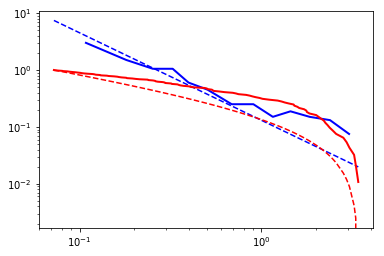

% spikes outside bulk 0.00
% sigma 1.3855


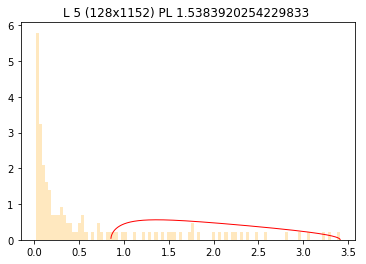

1.5383920254229833 0.2179666272881683 TPL


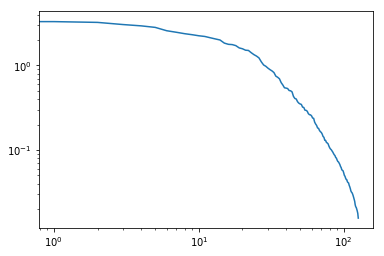

(3, 3, 128, 256)
(1152, 256)


Calculating best minimal value for power law fit
Assuming nested distributions


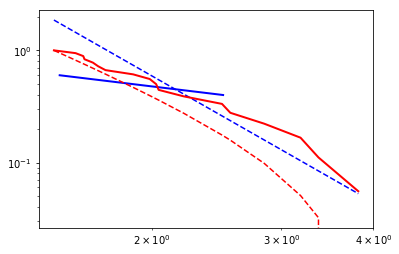

% spikes outside bulk 0.00
% sigma 1.3273


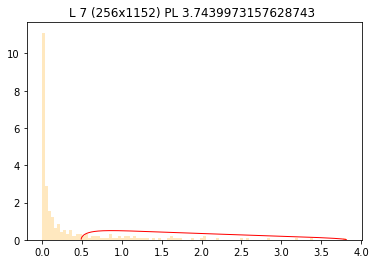

3.7439973157628743 0.1603450978700377 PL


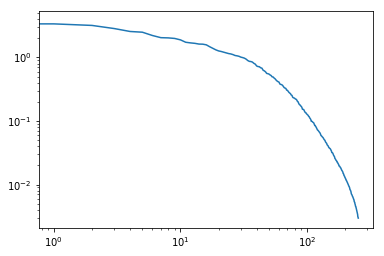

(3, 3, 256, 256)
(2304, 256)


Calculating best minimal value for power law fit
Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


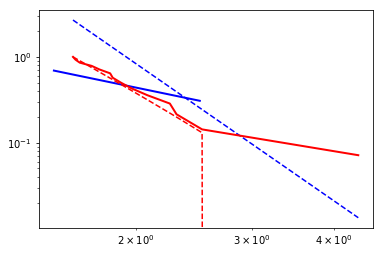

% spikes outside bulk 0.00
% sigma 1.5651


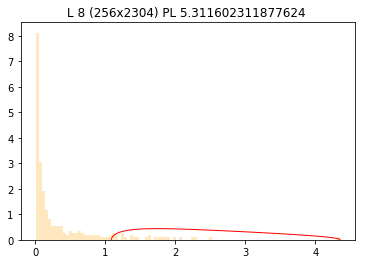

5.311602311877624 0.0783515605990312 PL


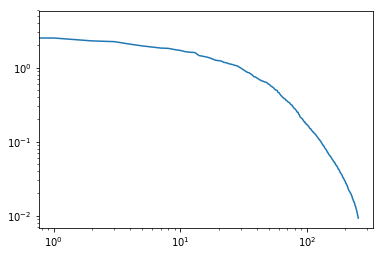

(3, 3, 256, 256)
(2304, 256)


Calculating best minimal value for power law fit
Assuming nested distributions


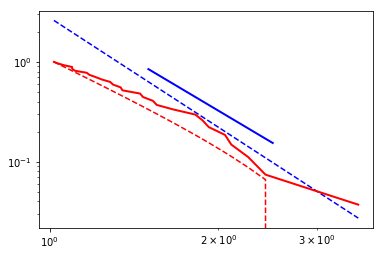

% spikes outside bulk 0.00
% sigma 1.4138


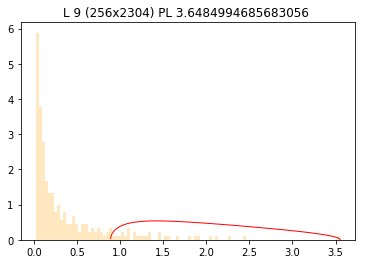

3.6484994685683056 0.11290631974963927 PL


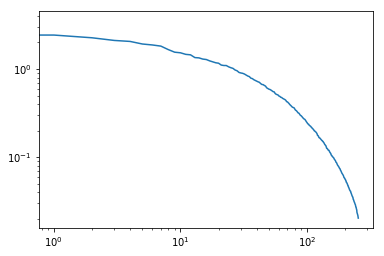

(3, 3, 256, 512)
(2304, 512)


Calculating best minimal value for power law fit
Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


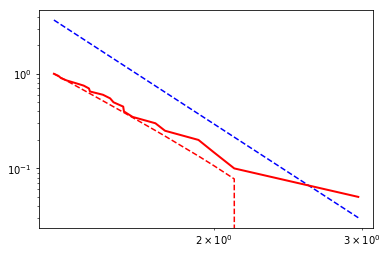

% spikes outside bulk 0.00
% sigma 1.1715


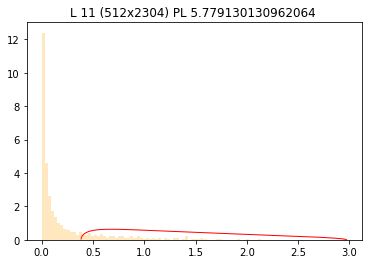

5.779130130962064 0.0824680021956456 PL


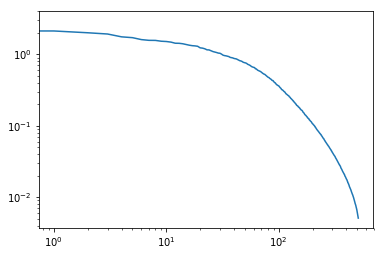

(3, 3, 512, 512)
(4608, 512)


Calculating best minimal value for power law fit
Assuming nested distributions


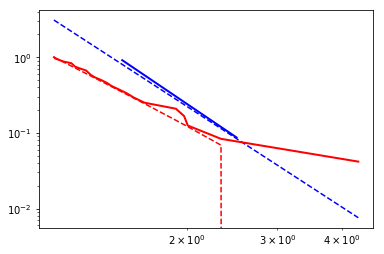

% spikes outside bulk 0.00
% sigma 1.5565


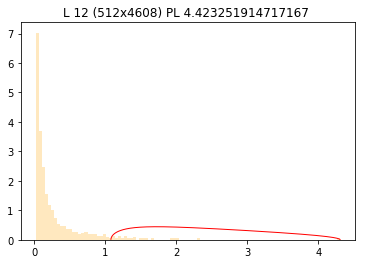

4.423251914717167 0.06870826723649284 PL


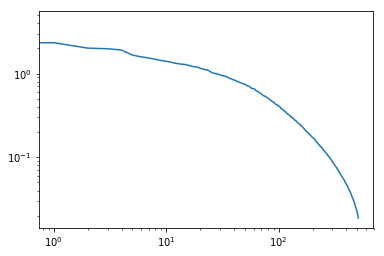

(3, 3, 512, 512)
(4608, 512)


Calculating best minimal value for power law fit
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


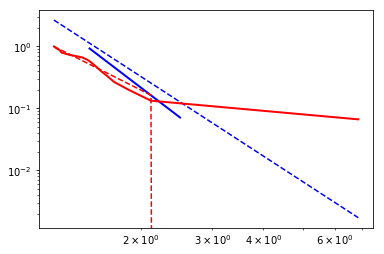

% spikes outside bulk 0.00
% sigma 1.9612


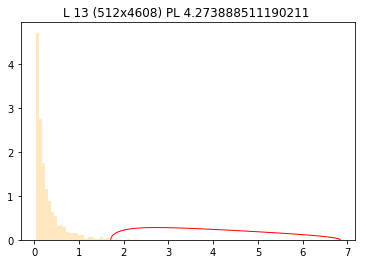

4.273888511190211 0.07533475594187339 PL


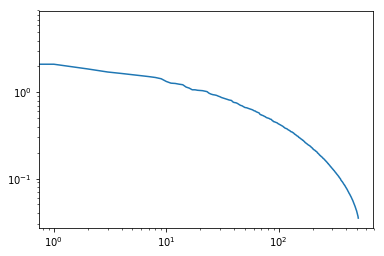

(3, 3, 512, 512)
(4608, 512)


Calculating best minimal value for power law fit
Assuming nested distributions


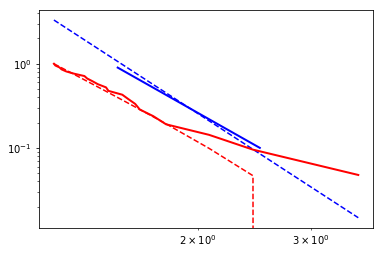

% spikes outside bulk 0.00
% sigma 1.4154


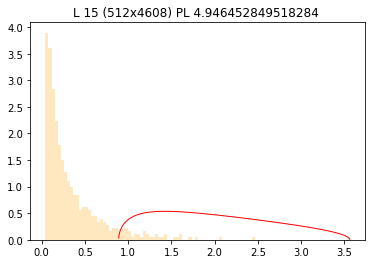

4.946452849518284 0.07026601625696022 PL


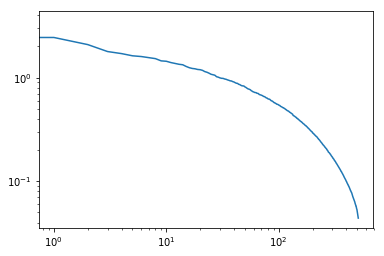

(3, 3, 512, 512)
(4608, 512)


Calculating best minimal value for power law fit
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


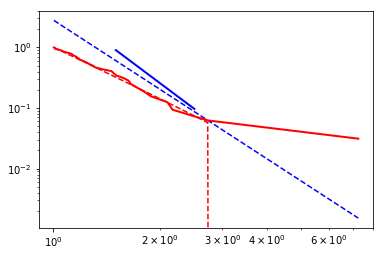

% spikes outside bulk 0.00
% sigma 2.0201


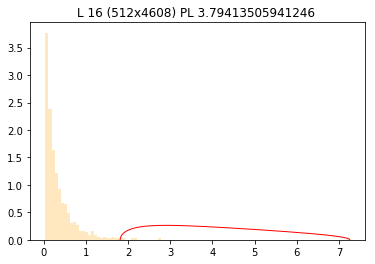

3.79413505941246 0.058753198372498316 PL


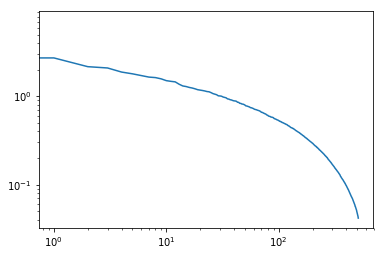

(3, 3, 512, 512)
(4608, 512)


Calculating best minimal value for power law fit
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


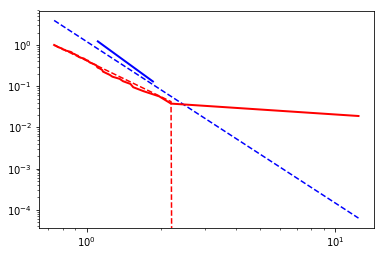

% spikes outside bulk 0.00
% sigma 2.6448


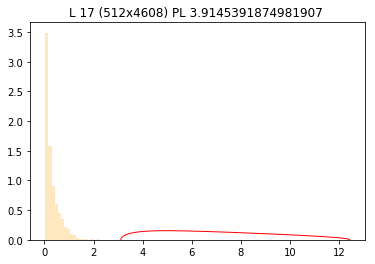

3.9145391874981907 0.0409344301899871 PL


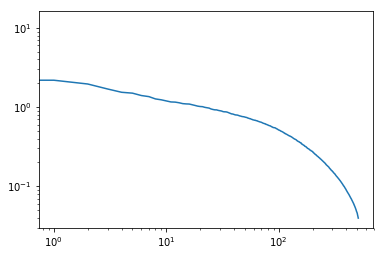

(25088, 4096)
(25088, 4096)


Calculating best minimal value for power law fit
Assuming nested distributions


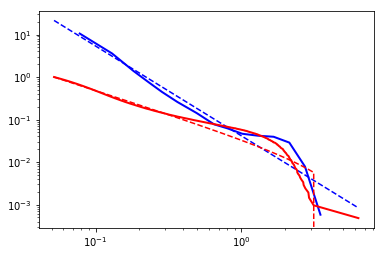

% spikes outside bulk 0.00
% sigma 1.7930


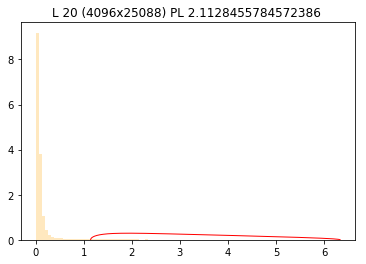

2.1128455784572386 0.025649090474994946 TPL


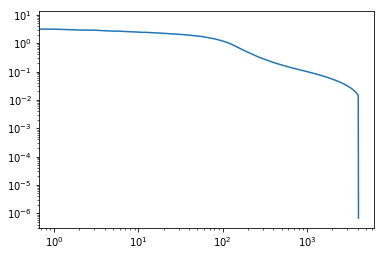

(4096, 4096)
(4096, 4096)


Calculating best minimal value for power law fit
Assuming nested distributions


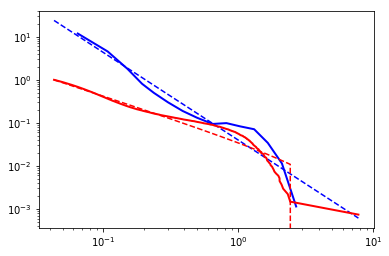

% spikes outside bulk 0.00
% sigma 1.3976


RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Utilility Library"


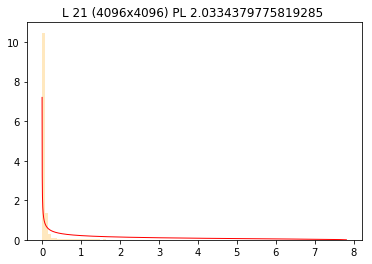

2.0334379775819285 0.03389592257667351 TPL


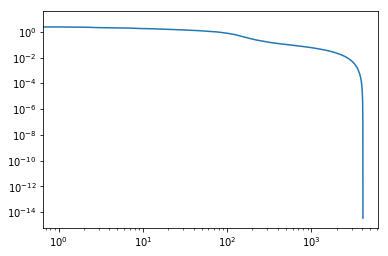

(4096, 1000)
(4096, 1000)


Calculating best minimal value for power law fit
Assuming nested distributions


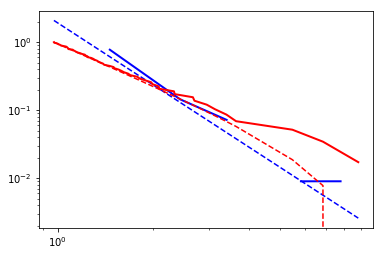

% spikes outside bulk 0.00
% sigma 1.9904


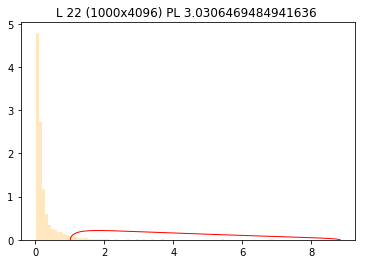

3.0306469484941636 0.03605770403902897 PL


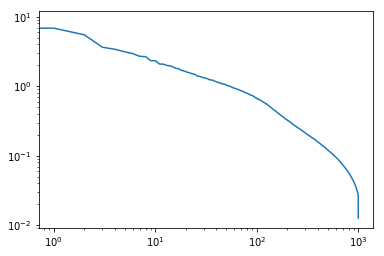

In [7]:
alphas = []
for kmodel in [vgg16.VGG16]:#, vgg19.VGG19, ]:
#for kmodel in [inception_resnet_v2]:
    kmodel(weights=None)
    model = kmodel(weights='imagenet')
  
    for il, l in enumerate(model.layers):
        print(l)

        if (l.get_weights()):
            W = l.get_weights()[0]
            W = RMT_Util.reshape_tensor(W)
            M, N = np.min(W.shape), np.max(W.shape)
            Q=N/M
            
            svd = TruncatedSVD(n_components=M-1, n_iter=7, random_state=10)
            svd.fit(W) 
            sv = svd.singular_values_
            evals_imagenet = sv*sv

            evals = evals_imagenet
            fit = powerlaw.Fit(evals, xmax=np.max(evals))
            alpha, D, best = fit.alpha, fit.D, RMT_Util.best_dist(fit)
            
            fig2 = fit.plot_pdf(color='b', linewidth=2)
            fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
            fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
            fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
            plt.show()
            
            #if (alpha > 4.0):
            RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals_imagenet, layer=None, 
                                        Q=Q, num_spikes=0, sigma=None, color='orange')
            plt.title("L {} ({}x{}) PL {} ".format(il, M,N, alpha))
            plt.show()          
            print(alpha, D, best)

            

            plt.loglog(evals_imagenet)
            plt.show()
            
            alphas.append(alpha)
        
        

In [ ]:
plt.hist(evals_imagenet,bins=200,log=True, density=True)
plt.xscale('log')
plt.show()

In [ ]:
import powerlaw
evals = evals_imagenet


In [ ]:
print(len(alphas))
plt.hist(alphas);

In [ ]:

def analyze_model(model):
    alphas = []
    for l in model.layers:
        print(l)
        if l.get_weights():
            W = l.get_weights()[0]
            W = RMT_Util.reshape_tensor(W)
            M, N = np.min(W.shape), np.max(W.shape)
            if ((N>43) and (M>43)):
                Q=N/M

                svd = TruncatedSVD(n_components=M-1, n_iter=7, random_state=10)
                svd.fit(W) 
                sv = svd.singular_values_
                evals_imagenet = sv*sv

                RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals_imagenet, layer=None, 
                                            Q=Q, num_spikes=0, sigma=None, color='orange')
                plt.title("Layer ({}x{})".format(M,N))
                plt.show()     

                alpha, D, best = RMT_Util.fit_powerlaw(evals_imagenet)
                print(alpha, D, best)
                alphas.append(alpha)
    return alphas

In [ ]:
for kmodel in [inception_resnet_v2.InceptionResNetV2]:
    kmodel(weights=None)
    model = kmodel(weights='imagenet')
    alphas = analyze_model(model)

In [ ]:
print(len(alphas))
plt.hist(alphas,bins=50);
plt.title("power law fits, InceptionResNetV2")

In [ ]:
for kmodel in [mobilenet.MobileNet]:
    kmodel(weights=None)
    model = kmodel(weights='imagenet')
    alphas = analyze_model(model)

In [ ]:
print(len(alphas))
plt.hist(alphas,bins=30);
plt.title("power law fits, MobileNet")

In [ ]:
for kmodel in [nasnet.NASNetLarge]:
    kmodel(weights=None)
    model = kmodel(weights='imagenet')
    alphas = analyze_model(model)

In [ ]:
print(len(alphas))
plt.hist(alphas,bins=30);
plt.title("power law fits, NasNetLarge")

In [ ]:
for kmodel in [nasnet.NASNetMobile]:
    kmodel(weights=None)
    model = kmodel(weights='imagenet')
    alphas = analyze_model(model)

In [ ]:
print(len(alphas))
plt.hist(alphas,bins=30);
plt.title("power law fits, NasNetMobile")

In [ ]:
!pip install oct2py